In [1]:
"""
folderPath = "embdFiles/"
f_file = "fake_"
nf_file = 'not_fake_'
endN = "_NOUN.txt"
listNouns = ['article','beard','blood','company','death','gun','id','interview','passport']
for noun in listNouns:
    fPath = folderPath + f_file + noun + endN
    nfPath = folderPath + nf_file + noun + endN
    arrF = np.genfromtxt(fPath,delimiter=' ',dtype='float32')
    arrNF = np.genfromtxt(nfPath,delimiter=' ',dtype='float32')
    with open('files/'+ noun+'FAKE.npy','wb') as f:
        np.save(file=f,arr=arrF)
    with open('files/'+ noun+'.npy','wb') as f:
        np.save(file=f,arr=arrNF)
    print("done for "+noun)
    
"""

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
cols = ['fileName','noun','fake','size','start','end']
indexer = pd.DataFrame(columns=cols)
df = pd.DataFrame(columns=range(1024))

In [4]:
listNouns = ['article','beard','blood','company','death','gun','id','interview','passport']
for noun in listNouns:
    arrF = np.load('files/'+noun+'FAKE.npy')
    arrNF = np.load('files/'+noun+'.npy')
    
    count=len(df)
    df = df.append(pd.DataFrame(arrF),ignore_index=True)
    d_temp = pd.DataFrame(data=[[noun+'FAKE.npy',noun,True,arrF.shape[0],count,len(df)-1]],columns=cols)
    indexer = indexer.append(d_temp,ignore_index=True)
    
    count=len(df)
    df = df.append(pd.DataFrame(arrNF),ignore_index=True)
    d_temp = pd.DataFrame(data=[[noun+'.npy',noun,False,arrNF.shape[0],count,len(df)-1]],columns=cols)
    indexer = indexer.append(d_temp,ignore_index=True)
    
    print("done for "+noun)

done for article
done for beard
done for blood
done for company
done for death
done for gun
done for id
done for interview
done for passport


In [5]:
df

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,-0.523996,0.204620,-0.246581,0.140947,-0.538973,-0.008648,0.136815,0.683395,0.199808,0.335722,...,0.990603,0.922207,-0.414351,0.060789,-0.363064,0.042701,0.285413,-0.256314,-0.881946,-0.331497
1,-0.185744,0.279439,0.449641,0.137179,-0.236610,-0.187783,0.277394,0.898378,-0.106310,-0.206979,...,0.930113,1.132280,-0.555202,0.284229,-0.229590,-0.720457,-0.579650,0.093702,-0.750622,-1.209514
2,0.184349,-0.207430,0.264114,0.049451,-0.212629,0.560823,0.094886,0.790711,0.543264,0.167351,...,0.262796,0.481539,0.300324,-0.180722,-0.291072,-0.159994,-0.163193,-0.072622,-1.023986,-0.382163
3,-0.261046,-0.244796,0.002302,0.328447,0.011963,0.140005,0.942619,0.516317,0.555294,0.128133,...,0.266830,0.505061,0.292044,-0.214778,-0.296211,-0.183135,-0.160906,-0.079496,-0.995336,-0.363676
4,-0.268572,-0.417002,0.019468,0.528420,-0.023522,-0.111268,0.579951,1.238461,0.766880,0.072032,...,1.179042,0.732503,-0.440512,-0.749835,-0.326428,0.734036,-0.445936,-0.344892,-1.341255,-0.653697
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87452,-0.157554,-0.325507,-0.982814,-0.450416,0.051014,0.058958,0.256330,0.376463,0.273021,-1.839084,...,-0.140783,-0.109629,0.112392,-0.221889,0.324191,1.684708,-0.437126,0.756803,-0.529720,0.184574
87453,0.381927,-0.116069,-0.374094,-0.924988,0.030357,0.466354,0.664458,0.237988,0.599404,-0.156525,...,0.927361,-0.575147,0.661001,-0.778125,0.949155,-0.033191,0.136665,-0.797816,-0.076282,0.914037
87454,-0.367728,-0.173093,0.102015,-0.290788,0.266030,0.881577,0.232056,0.803552,0.680300,-0.295039,...,0.817297,-0.307413,0.833485,-0.890025,0.892934,-0.056618,0.003550,-0.110993,-0.322765,0.146240
87455,-0.885210,-0.168991,-0.316996,-0.722204,0.195644,0.678581,0.458471,0.749155,-0.060972,-0.702212,...,0.586453,-0.691839,0.136545,-0.872466,0.859464,-0.586986,-0.419220,-0.769210,0.056227,0.618303


In [6]:
priv = ['beard','blood','company','death','gun']
indexer.insert(loc=3,column='privative',value=False)
for index, row in indexer.iterrows():
    if row['noun'] in priv:
        indexer.at[index,'privative']= True

In [7]:
indexer

,fileName,noun,fake,privative,size,start,end
0,articleFAKE.npy,article,True,False,82,0,81
1,article.npy,article,False,False,10392,82,10473
2,beardFAKE.npy,beard,True,True,44,10474,10517
3,beard.npy,beard,False,True,3752,10518,14269
4,bloodFAKE.npy,blood,True,True,150,14270,14419
5,blood.npy,blood,False,True,11395,14420,25814
6,companyFAKE.npy,company,True,True,25,25815,25839
7,company.npy,company,False,True,10802,25840,36641
8,deathFAKE.npy,death,True,True,46,36642,36687
9,death.npy,death,False,True,10323,36688,47010


In [8]:
priv_fakes_idx = indexer[(indexer.fake) & (indexer.privative)]
priv_fakes_idx

,fileName,noun,fake,privative,size,start,end
2,beardFAKE.npy,beard,True,True,44,10474,10517
4,bloodFAKE.npy,blood,True,True,150,14270,14419
6,companyFAKE.npy,company,True,True,25,25815,25839
8,deathFAKE.npy,death,True,True,46,36642,36687
10,gunFAKE.npy,gun,True,True,24,47011,47034


In [9]:
fakes = pd.DataFrame(columns=range(1024))
for index, row in indexer[indexer['fake']].iterrows():
    fakes=fakes.append(df.loc[row['start']:row['end']])
fakes

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,-0.523996,0.204620,-0.246581,0.140947,-0.538973,-0.008648,0.136815,0.683395,0.199808,0.335722,...,0.990603,0.922207,-0.414351,0.060789,-0.363064,0.042701,0.285413,-0.256314,-0.881946,-0.331497
1,-0.185744,0.279439,0.449641,0.137179,-0.236610,-0.187783,0.277394,0.898378,-0.106310,-0.206979,...,0.930113,1.132280,-0.555202,0.284229,-0.229590,-0.720457,-0.579650,0.093702,-0.750622,-1.209514
2,0.184349,-0.207430,0.264114,0.049451,-0.212629,0.560823,0.094886,0.790711,0.543264,0.167351,...,0.262796,0.481539,0.300324,-0.180722,-0.291072,-0.159994,-0.163193,-0.072622,-1.023986,-0.382163
3,-0.261046,-0.244796,0.002302,0.328447,0.011963,0.140005,0.942619,0.516317,0.555294,0.128133,...,0.266830,0.505061,0.292044,-0.214778,-0.296211,-0.183135,-0.160906,-0.079496,-0.995336,-0.363676
4,-0.268572,-0.417002,0.019468,0.528420,-0.023522,-0.111268,0.579951,1.238461,0.766880,0.072032,...,1.179042,0.732503,-0.440512,-0.749835,-0.326428,0.734036,-0.445936,-0.344892,-1.341255,-0.653697
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78205,-0.187993,0.002119,0.002521,-0.033098,0.145644,0.702625,0.176351,0.891461,0.578586,0.216020,...,0.222041,0.246382,1.081116,-0.602398,0.628385,-0.545906,-0.487585,-0.797118,-0.258258,-0.226252
78206,-0.217395,-0.406989,-0.204557,-0.422270,0.096728,0.117493,0.369038,0.617234,0.988335,-0.349395,...,-0.204559,-0.089859,1.013988,-0.728381,0.371209,-0.394883,-0.113984,-0.191975,0.102365,-0.198360
78207,-0.105708,0.149659,0.460770,0.353352,0.610382,0.063897,0.615269,0.843542,1.184160,0.368455,...,0.054148,-0.265190,0.824305,-0.948488,0.268826,-0.492487,-0.023908,-0.775329,-0.477179,-0.229919
78208,0.149422,0.081277,0.186410,-0.136375,0.493431,0.495692,0.552928,0.799450,1.092505,0.139939,...,0.321762,0.061890,-0.434705,0.086288,0.764638,-0.217102,-0.430316,0.081892,-1.309600,-0.267566


In [10]:
if 'priv' in fakes.columns:
    fakes = fakes.drop(columns=['priv'])
    
fakes.insert(loc=1024,column='priv',value=-1)
for index, row in priv_fakes_idx.iterrows():
    for i in range(row['start'],row['end']+1):
        fakes.at[i,'priv']= 1


if 'noun' in fakes.columns:
    fakes = fakes.drop(columns=['noun'])
    
fakes.insert(loc=1024,column='noun',value='')
for index, row in indexer[indexer['fake']].iterrows():
    for i in range(row['start'],row['end']+1):
        fakes.at[i,'noun']= row['noun']

targets = fakes['priv']
nouns = fakes['noun']
X = fakes.drop(columns=['priv','noun'])
fakes

,0,1,2,3,4,5,6,7,8,9,...,1016,1017,1018,1019,1020,1021,1022,1023,noun,priv
0,-0.523996,0.204620,-0.246581,0.140947,-0.538973,-0.008648,0.136815,0.683395,0.199808,0.335722,...,-0.414351,0.060789,-0.363064,0.042701,0.285413,-0.256314,-0.881946,-0.331497,article,-1
1,-0.185744,0.279439,0.449641,0.137179,-0.236610,-0.187783,0.277394,0.898378,-0.106310,-0.206979,...,-0.555202,0.284229,-0.229590,-0.720457,-0.579650,0.093702,-0.750622,-1.209514,article,-1
2,0.184349,-0.207430,0.264114,0.049451,-0.212629,0.560823,0.094886,0.790711,0.543264,0.167351,...,0.300324,-0.180722,-0.291072,-0.159994,-0.163193,-0.072622,-1.023986,-0.382163,article,-1
3,-0.261046,-0.244796,0.002302,0.328447,0.011963,0.140005,0.942619,0.516317,0.555294,0.128133,...,0.292044,-0.214778,-0.296211,-0.183135,-0.160906,-0.079496,-0.995336,-0.363676,article,-1
4,-0.268572,-0.417002,0.019468,0.528420,-0.023522,-0.111268,0.579951,1.238461,0.766880,0.072032,...,-0.440512,-0.749835,-0.326428,0.734036,-0.445936,-0.344892,-1.341255,-0.653697,article,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78205,-0.187993,0.002119,0.002521,-0.033098,0.145644,0.702625,0.176351,0.891461,0.578586,0.216020,...,1.081116,-0.602398,0.628385,-0.545906,-0.487585,-0.797118,-0.258258,-0.226252,passport,-1
78206,-0.217395,-0.406989,-0.204557,-0.422270,0.096728,0.117493,0.369038,0.617234,0.988335,-0.349395,...,1.013988,-0.728381,0.371209,-0.394883,-0.113984,-0.191975,0.102365,-0.198360,passport,-1
78207,-0.105708,0.149659,0.460770,0.353352,0.610382,0.063897,0.615269,0.843542,1.184160,0.368455,...,0.824305,-0.948488,0.268826,-0.492487,-0.023908,-0.775329,-0.477179,-0.229919,passport,-1
78208,0.149422,0.081277,0.186410,-0.136375,0.493431,0.495692,0.552928,0.799450,1.092505,0.139939,...,-0.434705,0.086288,0.764638,-0.217102,-0.430316,0.081892,-1.309600,-0.267566,passport,-1


In [11]:
from sklearn.manifold import TSNE
import matplotlib.patches as mpatches

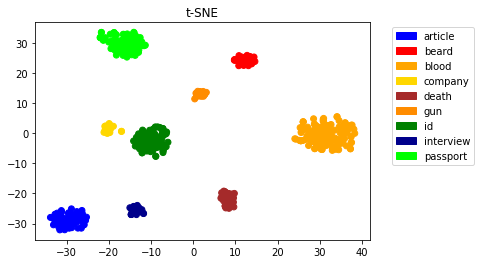

In [12]:
tsne = TSNE(n_components=2, init='pca', random_state=0)
trans_data = tsne.fit_transform(X).T

colors={'article':'blue','beard':'red','blood':'orange','company':'gold','death':'brown','gun':'darkorange','id':'green','interview':'darkblue','passport':'lime'}

plt.scatter(trans_data[0], trans_data[1], color=nouns.map(colors))
handles = [mpatches.Patch(color=colors[n],label=n) for n in ('article','beard','blood','company','death','gun','id','interview','passport')]
plt.legend(handles = handles,bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title("t-SNE")
plt.axis('tight')
plt.show()

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline

from sklearn.preprocessing import StandardScaler as Scaler
from sklearn.decomposition import PCA


from sklearn.naive_bayes import GaussianNB as NB
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.tree import DecisionTreeClassifier as DT
from sklearn.linear_model import LogisticRegression as LR

In [14]:
#The training set should be balanced in term of repartition of nouns

Xtrain,Xtest,Ttrain,Ttest =train_test_split(X, targets, test_size=0.4, random_state=0, stratify=nouns,shuffle=True)

#Preview the balancing of the dataset
nouns.loc[Xtrain.index].value_counts()/len(Xtrain)

blood        0.250696
passport     0.169916
id           0.161560
article      0.136490
death        0.077994
beard        0.072423
interview    0.050139
company      0.041783
gun          0.038997
Name: noun, dtype: float64

In [15]:
model = make_pipeline(Scaler(),LR())
model.fit(Xtrain,Ttrain)
y_train = model.predict(Xtrain)
y_test = model.predict(Xtest)

Tacc = np.sum(Ttrain == y_train)/len(Xtrain)
Gacc = np.sum(Ttest == y_test)/len(Xtest)

print(Tacc,Gacc)

1.0 1.0


In [16]:
def AccuracyRateBan(classifier,Xtrain,Ttrain,Xbanned,Tbanned):
    model = make_pipeline(Scaler(),PCA(n_components=0.975),classifier)
    model.fit(Xtrain,Ttrain)
    y_train = model.predict(Xtrain)
    Tacc = np.sum(Ttrain == y_train)/len(Xtrain)
    y_banned = model.predict(Xbanned)
    Bacc = np.sum(Tbanned == y_banned)/len(Xbanned)
    return (Tacc,Bacc)

def AvgAccBan(classifier):
    Taccs = np.zeros(len(listNouns))
    Baccs = np.zeros(len(listNouns))
    for i,bannedW in enumerate(listNouns):
        Xtrain = X[nouns!=bannedW]
        Ttrain = targets[nouns!=bannedW]
        Xbanned = X[nouns==bannedW]
        Tbanned = targets[nouns==bannedW]
        Tacc,Bacc = AccuracyRateBan(classifier,Xtrain,Ttrain,Xbanned,Tbanned)
        Taccs[i],Baccs[i] = Tacc, Bacc
    AvgTrain = np.mean(Taccs)
    AvgBanned = np.mean(Baccs)
    return (AvgTrain,AvgBanned)


models = {'NB':None,'KNN':range(2,41),'DT':range(3,11),'LR':None}
for modelName in models:
    if modelName == 'NB':
        classifier = NB()
        Tacc,Bacc =  AvgAccBan(classifier)
        print('NB ------ Train Accuracy : {}  ||  Test Accuracy : {}'.format(np.round(Tacc,4),np.round(Bacc,4)))
    elif modelName == 'LR':
        classifier = LR(n_jobs=2,multi_class='ovr')
        Tacc,Bacc =  AvgAccBan(classifier)
        print('LR ------ Train Accuracy : {}  ||  Test Accuracy : {}'.format(np.round(Tacc,4),np.round(Bacc,4)))
    elif modelName == 'KNN':
        params = models[modelName]
        Taccs = np.zeros(len(params))
        Baccs = np.zeros(len(params))
        for i,n in enumerate(params):
            classifier = KNN(n,n_jobs=2)
            Taccs[i],Baccs[i] =  AvgAccBan(classifier)
        best = np.argmax(Baccs)
        print('KNN({}) ------ Train Accuracy : {}  ||  Test Accuracy : {}'.format(params[best],np.round(Taccs[best],4),np.round(Baccs[best],4)))
    elif modelName == 'DT':
        params = models[modelName]
        Taccs = np.zeros(len(params))
        Baccs = np.zeros(len(params))
        for i,n in enumerate(params):
            classifier = DT(max_depth=n)
            Taccs[i],Baccs[i] =  AvgAccBan(classifier)
        best = np.argmax(Baccs)
        print('DT(max_depth:{}) ------ Train Accuracy : {}  ||  Test Accuracy : {}'.format(params[best],np.round(Taccs[best],4),np.round(Baccs[best],4)))
       

    




NB ------ Train Accuracy : 0.9645  ||  Test Accuracy : 0.5937
KNN(3) ------ Train Accuracy : 1.0  ||  Test Accuracy : 0.5784
DT(max_depth:6) ------ Train Accuracy : 1.0  ||  Test Accuracy : 0.6645
LR ------ Train Accuracy : 1.0  ||  Test Accuracy : 0.5747


In [17]:
nouns.value_counts()

blood        150
passport     102
id            96
article       82
death         46
beard         44
interview     30
company       25
gun           24
Name: noun, dtype: int64

# AT THIS POINT, I REALIZED I WAS USING THE WRONG EMBEDDINGS (lol)

The below embeddings are the embeddings of NOUN, not the embeddings of FAKE. We should classify FAKE embeddings.